In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import agent_inst_u as au
plt.rcParams.update({"font.size": 17, 'figure.figsize': [15, 7]})
FIGSIZE = (15, 5)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from utils import plot_interval_results, train, evaluate, plot_scores
# plt.rcParams.update({'font.size': 16})
# from agents.battery_model_rb_agent_ import BatteryModelRBAgent


# # Define the number of episodes being played and the schema
# class EvalConstants:
#     episodes = 1
#     compute_metric_interval = 1000
#     schema_path = './data/citylearn_challenge_2022_phase_1/schema.json'
#     evaluation_days = episodes * 365
#     sac_params = {}
#     rule_based_params = {}

# shared_agent = False
# verbos = True
# loading_dir = 'tmp'
# env, rl_coordinator = evaluate(BatteryModelRBAgent,
#                                EvalConstants,
#                                shared_agent=shared_agent,
#                                verbose=verbos,
#                                loading_dir=loading_dir,
#                                is_rule_based_agent=True)

In [ ]:
# for i in range(5):
#     df = pd.DataFrame.from_dict(rl_coordinator.decision_makers[i].data_history)
#     df.to_csv(f"data/rb_agent_building_{str(i)}.csv", index=False)

## Load agents' data

In [2]:
buindings_df = []
for i in range(5):
    buindings_df.append(pd.read_csv(f"data/rb_agent_building_{str(i)}.csv"))
    buindings_df[i]["soc"] = buindings_df[i]["soc"] * 6.4
    buindings_df[i]["diff_net_battery"] = np.concatenate((np.diff(buindings_df[i]["net_battery"]), np.array([0])))
    buindings_df[i]["diff_net_no_battery"] = np.concatenate((np.diff(buindings_df[i]["net_no_battery"]), np.array([0])))
    buindings_df[i]["diff_soc"] = np.concatenate((np.diff(buindings_df[i]["soc"]), np.array([0])))

In [3]:
buindings_df[0].head()

,month,price,carbon,load,solar,net_no_battery,soc,net_battery,actions,actions_kwh,diff_net_battery,diff_net_no_battery,diff_soc
0,7.0,0.22,0.170724,2.275800,0.0,2.275800,0.0,2.275800,-0.395104,-2.275800,-1.424633,-1.424633,0.0
1,8.0,0.22,0.157319,0.851167,0.0,0.851167,0.0,0.851167,-0.147772,-0.851167,-0.016567,-0.016567,0.0
2,8.0,0.22,0.154503,0.834600,0.0,0.834600,0.0,0.834600,-0.144896,-0.834600,0.003567,0.003567,0.0
3,8.0,0.22,0.150945,0.838167,0.0,0.838167,0.0,0.838167,-0.145515,-0.838167,0.640267,0.640267,0.0
4,8.0,0.22,0.151820,1.478433,0.0,1.478433,0.0,1.478433,-0.256672,-1.478433,-0.222233,-0.222233,0.0


In [4]:
buindings_df[1].head()

,month,price,carbon,load,solar,net_no_battery,soc,net_battery,actions,actions_kwh,diff_net_battery,diff_net_no_battery,diff_soc
0,7.0,0.22,0.170724,2.188750,0.0,2.188750,0.0,2.188750,-0.379991,-2.188750,-0.818083,-0.818083,0.0
1,8.0,0.22,0.157319,1.370667,0.0,1.370667,0.0,1.370667,-0.237963,-1.370667,-0.269417,-0.269417,0.0
2,8.0,0.22,0.154503,1.101250,0.0,1.101250,0.0,1.101250,-0.191189,-1.101250,-0.558033,-0.558033,0.0
3,8.0,0.22,0.150945,0.543217,0.0,0.543217,0.0,0.543217,-0.094308,-0.543217,-0.000383,-0.000383,0.0
4,8.0,0.22,0.151820,0.542833,0.0,0.542833,0.0,0.542833,-0.094242,-0.542833,0.969600,0.969600,0.0


<AxesSubplot:>

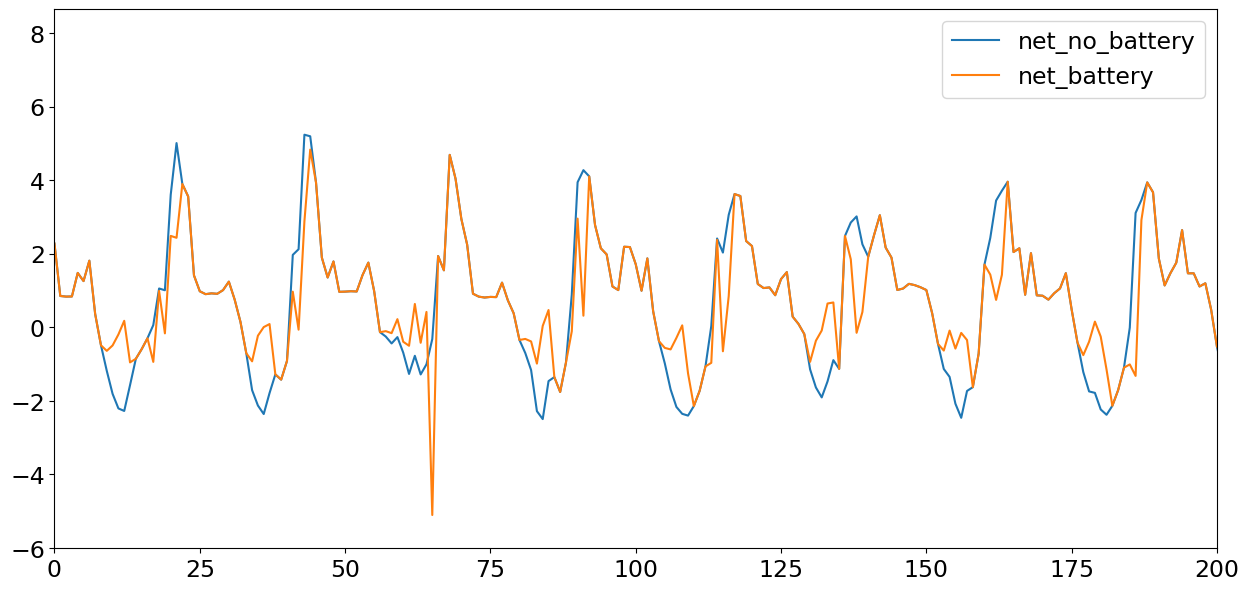

In [5]:
buindings_df[0].plot(y=['net_no_battery', 'net_battery'], xlim=(0, 200))

In [6]:
b0 = buindings_df[0]
print("Building 0 Agent's utilities:")
print(f"Pricing term:  {au.pricing_term(b0.iloc[0].net_battery, b0.iloc[0].price)}")
print(f"Carbon term:   {au.carbon_intensity_term(b0.iloc[0].net_battery, b0.iloc[0].carbon)}")
print(f"Ramping term:  {au.ramping_term(b0.iloc[0].diff_net_battery)}")
print(f"Load term:     {au.load_term(b0.iloc[0].net_battery, 7)}")
print(f"Total utility: {au.get_inst_u(b0.iloc[0].net_battery, b0.iloc[0].diff_net_battery-0, b0.iloc[0].price, b0.iloc[0].carbon, 7) - au.UTILITY_OFFSET}")

Building 0 Agent's utilities:
Pricing term:  2.649228781781745
Carbon term:   3.6775500003671384
Ramping term:  0.0
Load term:     0.0
Total utility: 0.5272315651790738


In [7]:
b0.iloc[0]

month                  7.000000
price                  0.220000
carbon                 0.170724
load                   2.275800
solar                  0.000000
net_no_battery         2.275800
soc                    0.000000
net_battery            2.275800
actions               -0.395104
actions_kwh           -2.275800
diff_net_battery      -1.424633
diff_net_no_battery   -1.424633
diff_soc               0.000000
Name: 0, dtype: float64

## Add utility terms to dataframes
### compute the instantaneous utility terms with battery

In [8]:
for i in range(5):
    pricing_term = []
    carbon_intensity_term = []
    ramping_term = []
    load_term = []
    get_inst_u = []
    
    for j in buindings_df[i].index:
        b = buindings_df[i].iloc[j]
        pricing_term.append(au.pricing_term(b.net_battery, b.price))
        carbon_intensity_term.append(au.carbon_intensity_term(b.net_battery, b.carbon))
        ramping_term.append(au.ramping_term(b.diff_net_battery))
        load_term.append(au.load_term(b.net_battery, int(b.month-1)))
        get_inst_u.append(au.get_inst_u(b.net_battery, b.diff_net_battery, b.price, b.carbon, int(b.month-1)) - au.UTILITY_OFFSET)
    
    buindings_df[i]["u_pricing_term"] = pricing_term
    buindings_df[i]["u_carbon_term"] = carbon_intensity_term
    buindings_df[i]["u_ramping_term"] = ramping_term
    buindings_df[i]["u_load_term"] = load_term
    buindings_df[i]["inst_utility"] = get_inst_u

### compute the instantaneous utility terms with no battery

In [9]:
for i in range(5):
    pricing_term = []
    carbon_intensity_term = []
    ramping_term = []
    load_term = []
    get_inst_u = []
    
    for j in buindings_df[i].index:
        b = buindings_df[i].iloc[j]
        pricing_term.append(au.pricing_term(b.net_no_battery, b.price))
        carbon_intensity_term.append(au.carbon_intensity_term(b.net_no_battery, b.carbon))
        ramping_term.append(au.ramping_term(b.diff_net_no_battery))
        load_term.append(au.load_term(b.net_no_battery, int(b.month-1)))
        get_inst_u.append(au.get_inst_u(b.net_no_battery, b.diff_net_no_battery, b.price, b.carbon, int(b.month-1)) - au.UTILITY_OFFSET)
    
    buindings_df[i]["u_pricing_term_no"] = pricing_term
    buindings_df[i]["u_carbon_term_no"] = carbon_intensity_term
    buindings_df[i]["u_ramping_term_no"] = ramping_term
    buindings_df[i]["u_load_term_no"] = load_term
    buindings_df[i]["inst_utility_no"] = get_inst_u

In [10]:
buindings_df[0].head()

,month,price,carbon,load,solar,net_no_battery,soc,net_battery,actions,actions_kwh,...,u_pricing_term,u_carbon_term,u_ramping_term,u_load_term,inst_utility,u_pricing_term_no,u_carbon_term_no,u_ramping_term_no,u_load_term_no,inst_utility_no
0,7.0,0.22,0.170724,2.275800,0.0,2.275800,0.0,2.275800,-0.395104,-2.275800,...,2.649229,3.677550,0.000000,0.0,0.527232,2.649229,3.677550,0.000000,0.0,0.527232
1,8.0,0.22,0.157319,0.851167,0.0,0.851167,0.0,0.851167,-0.147772,-0.851167,...,0.990832,1.267432,0.000000,0.0,0.188189,0.990832,1.267432,0.000000,0.0,0.188189
2,8.0,0.22,0.154503,0.834600,0.0,0.834600,0.0,0.834600,-0.144896,-0.834600,...,0.971547,1.220514,0.014037,0.0,0.183257,0.971547,1.220514,0.014037,0.0,0.183257
3,8.0,0.22,0.150945,0.838167,0.0,0.838167,0.0,0.838167,-0.145515,-0.838167,...,0.975699,1.197506,2.519834,0.0,0.286093,0.975699,1.197506,2.519834,0.0,0.286093
4,8.0,0.22,0.151820,1.478433,0.0,1.478433,0.0,1.478433,-0.256672,-1.478433,...,1.721025,2.124512,0.000000,0.0,0.320461,1.721025,2.124512,0.000000,0.0,0.320461


<AxesSubplot:>

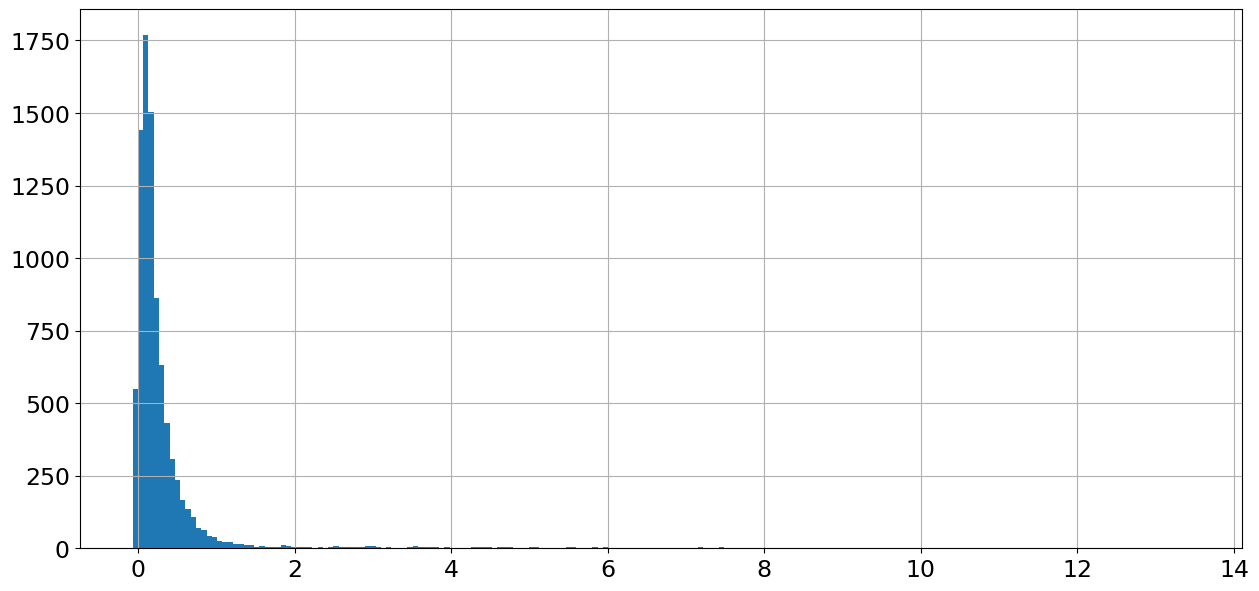

In [11]:
buindings_df[0]["inst_utility"].hist(bins=200)

In [12]:
buindings_df[0]["inst_utility"].min()

-0.07023193087411705

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

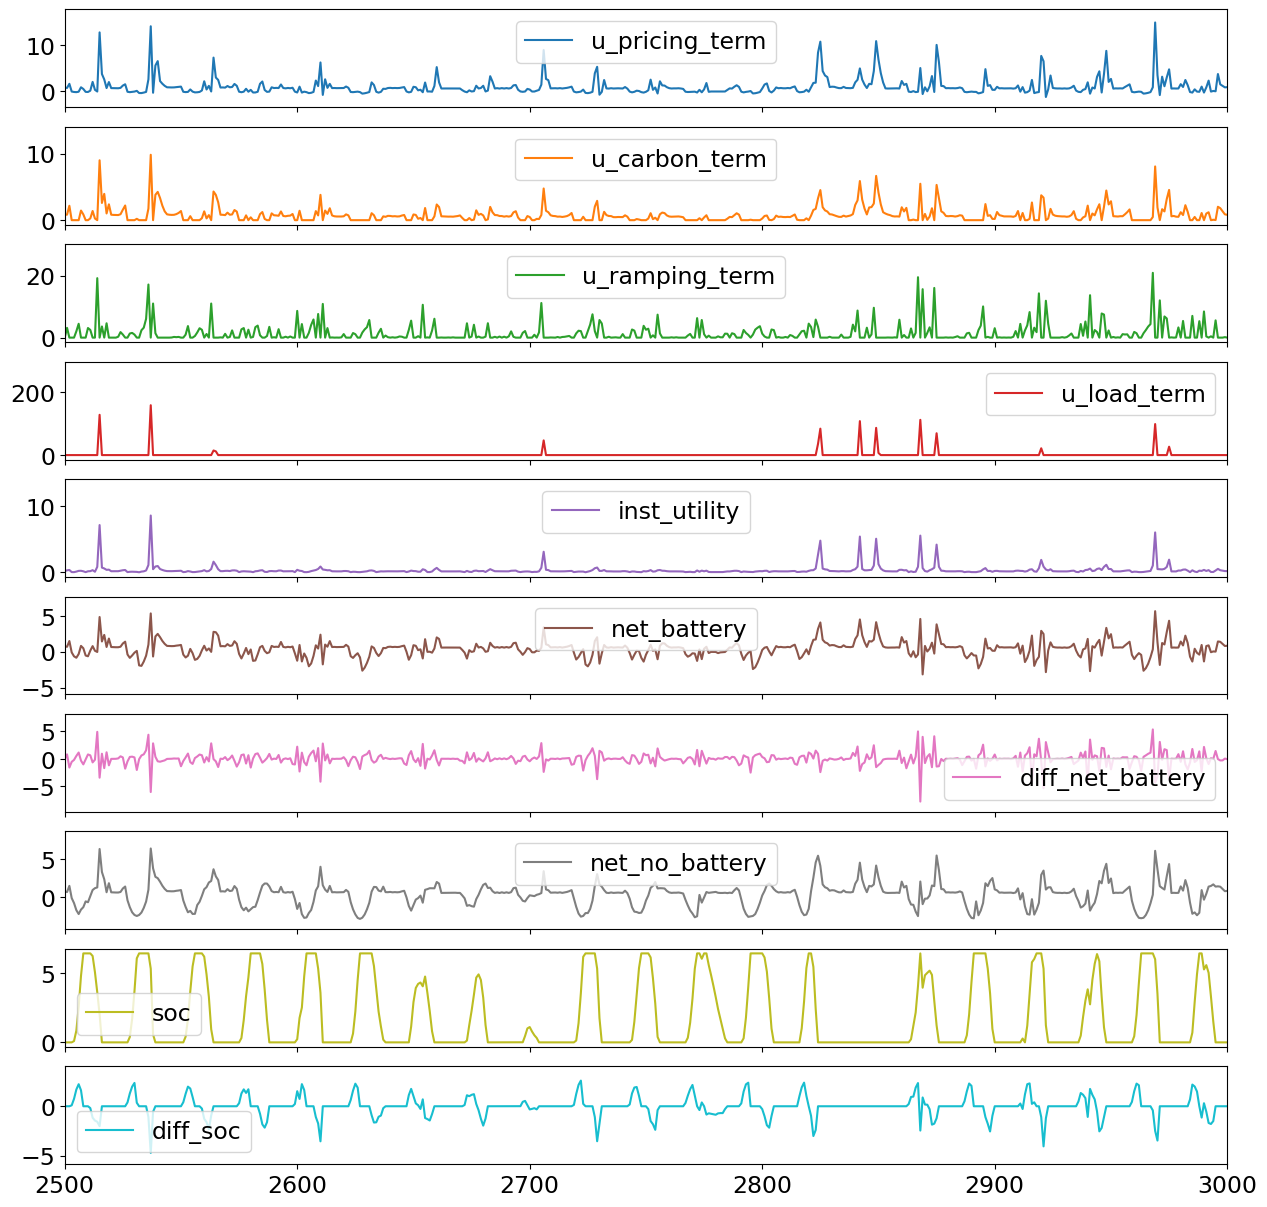

In [73]:
buindings_df[0].plot(subplots=True, y=["u_pricing_term", "u_carbon_term", "u_ramping_term", 
                                       "u_load_term", "inst_utility", "net_battery", "diff_net_battery", 
                                       "net_no_battery", "soc", "diff_soc"], 
                     xlim=(2500, 3000),
                    figsize=(15, 15))

<AxesSubplot:>

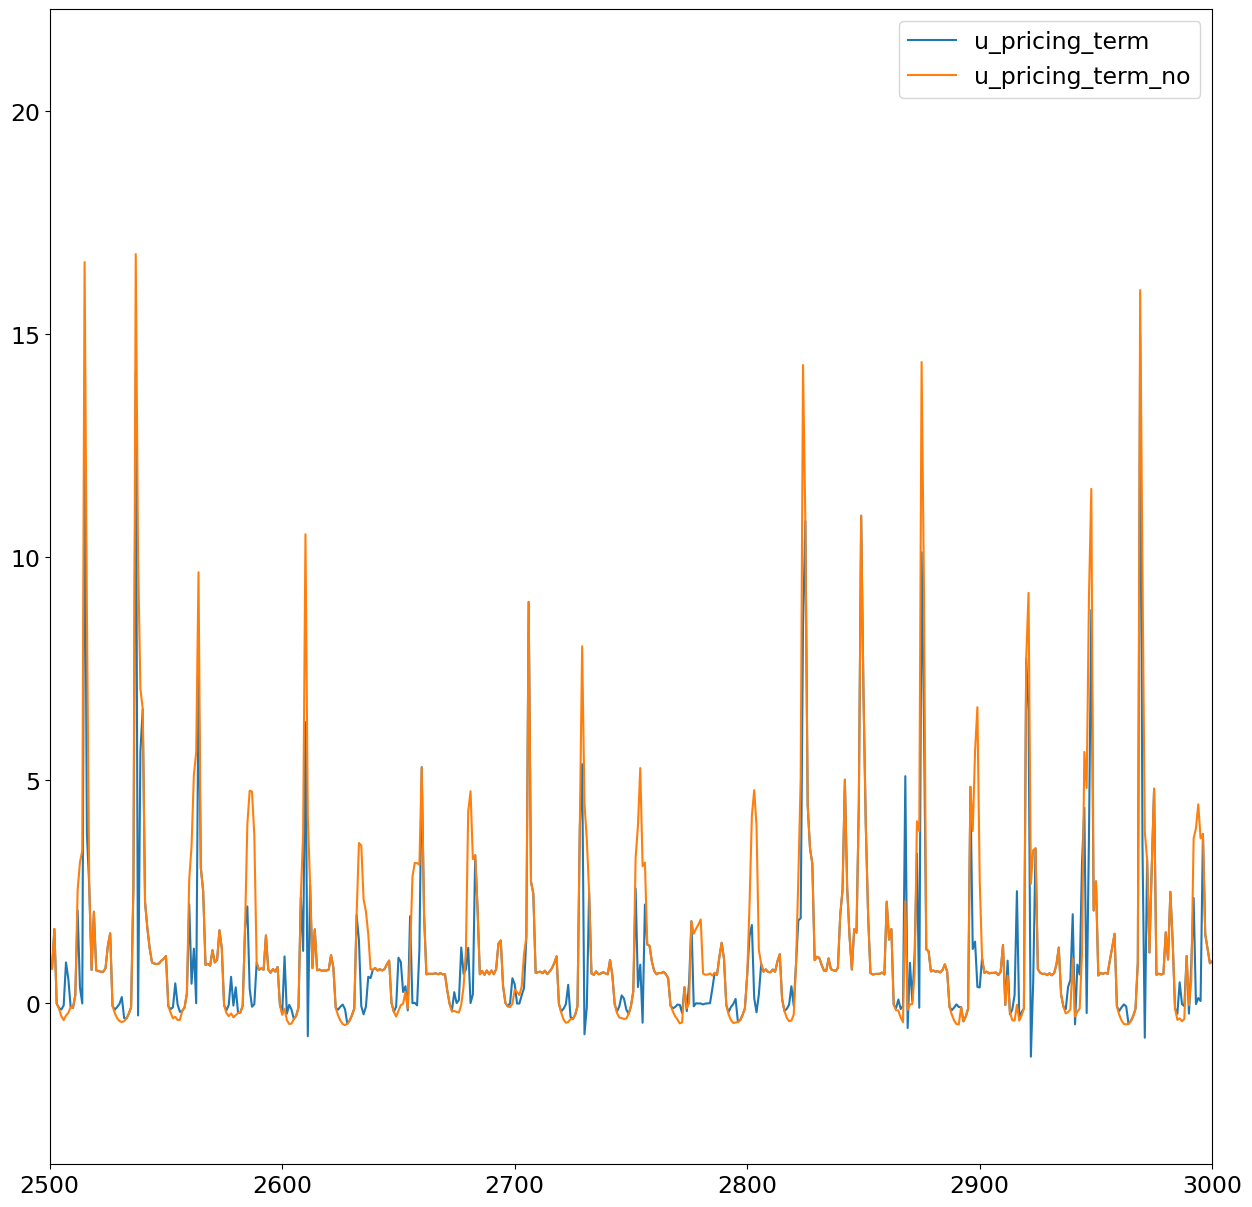

In [74]:
buindings_df[0].plot(y=["u_pricing_term", "u_pricing_term_no"], 
                     xlim=(2500, 3000),
                    figsize=(15, 15))

<AxesSubplot:>

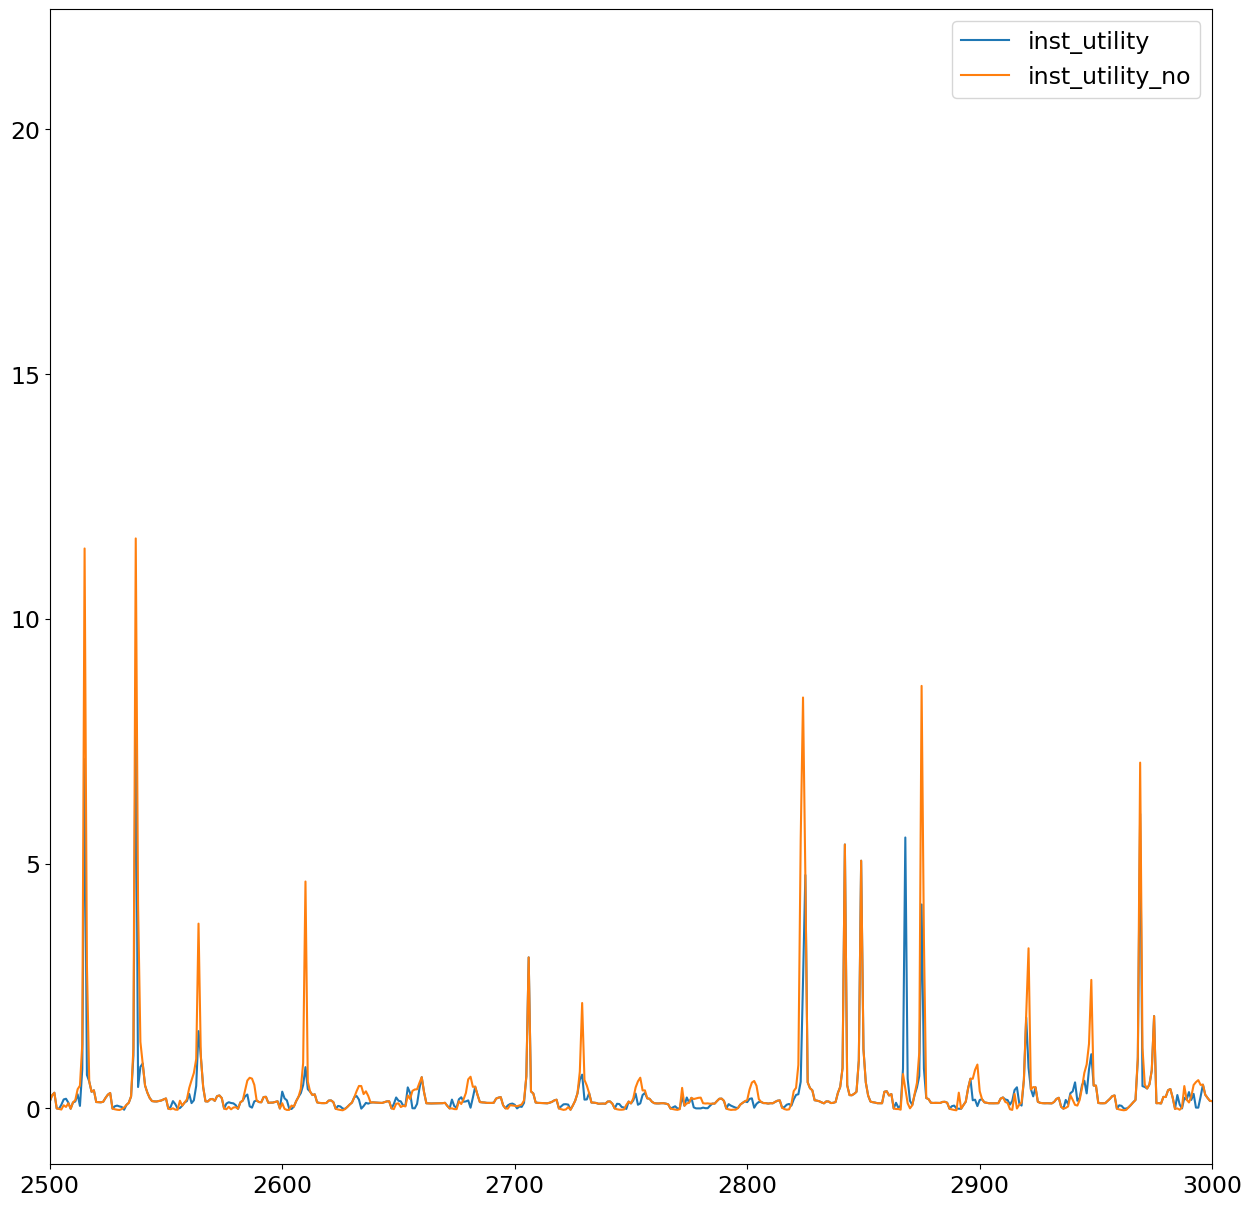

In [75]:
buindings_df[0].plot(y=["inst_utility", "inst_utility_no"], 
                     xlim=(2500, 3000),
                    figsize=(15, 15))

<AxesSubplot:>

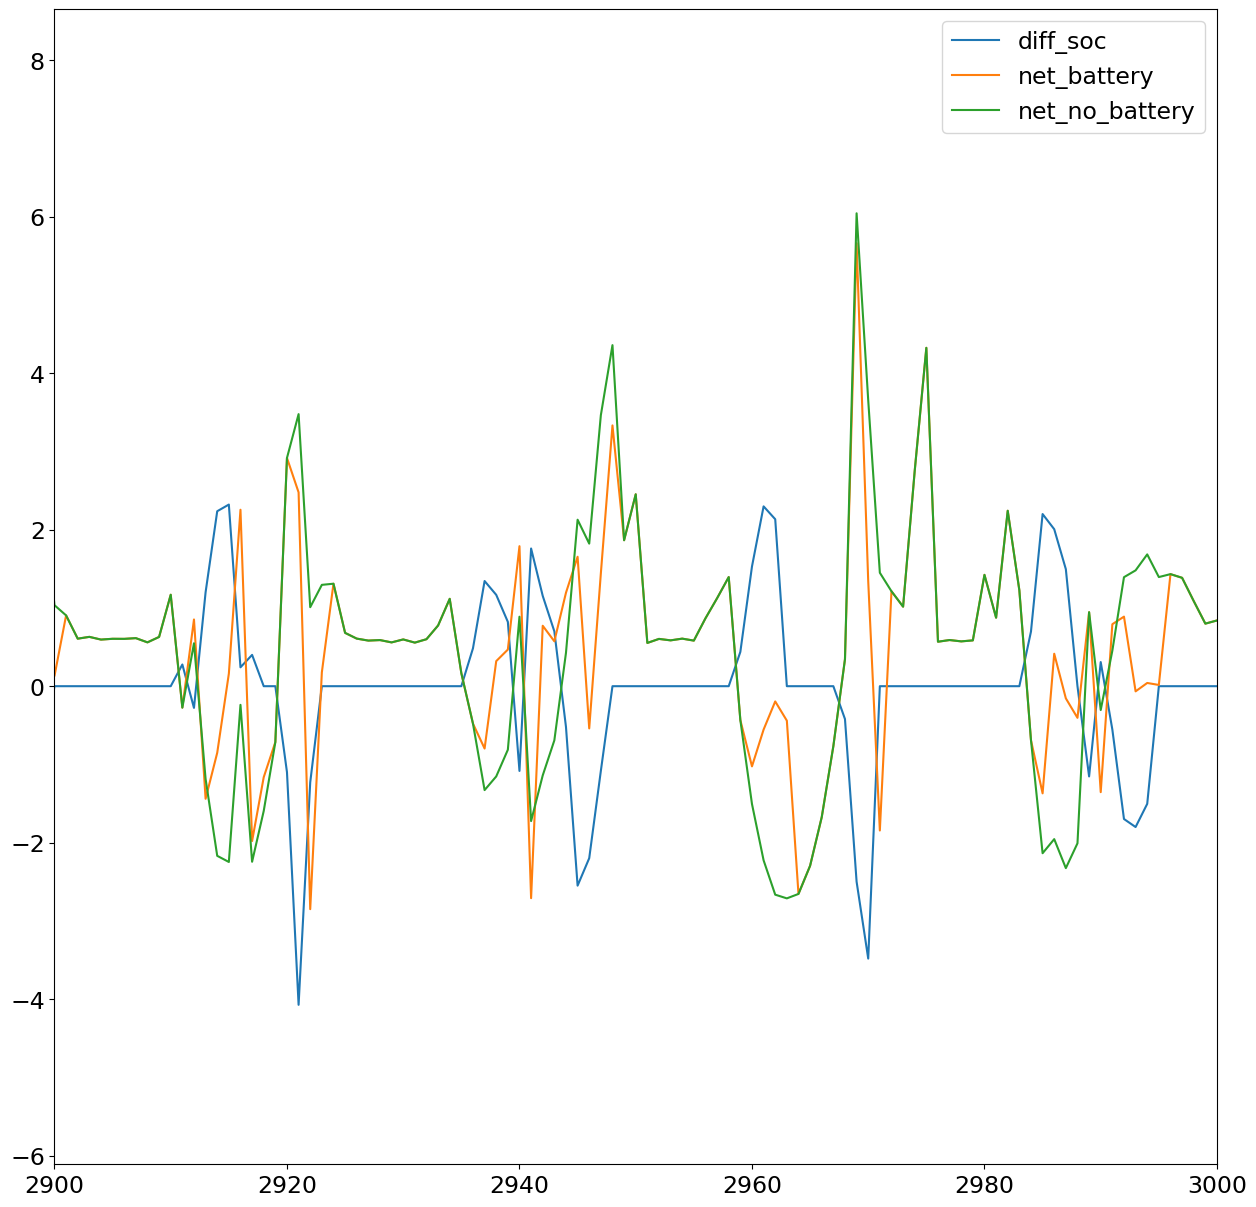

In [77]:
buindings_df[0].plot(y=["diff_soc", "net_battery", "net_no_battery"], 
                     xlim=(2900, 3000),
                    figsize=(15, 15))

### Comparing "diff_soc" + "net_no_battery" data to "net_battery"
The diff soc is computes as follows
$$dsoc[t] = soc[t+1] - soc[t]$$
Notice that the action at time $t$ is being executed at time $t+1$. Therefore, 
$$net-battery[t] = net-no-battery[t] + dsoc[t-1]$$
The plot below illustrates exactly that.

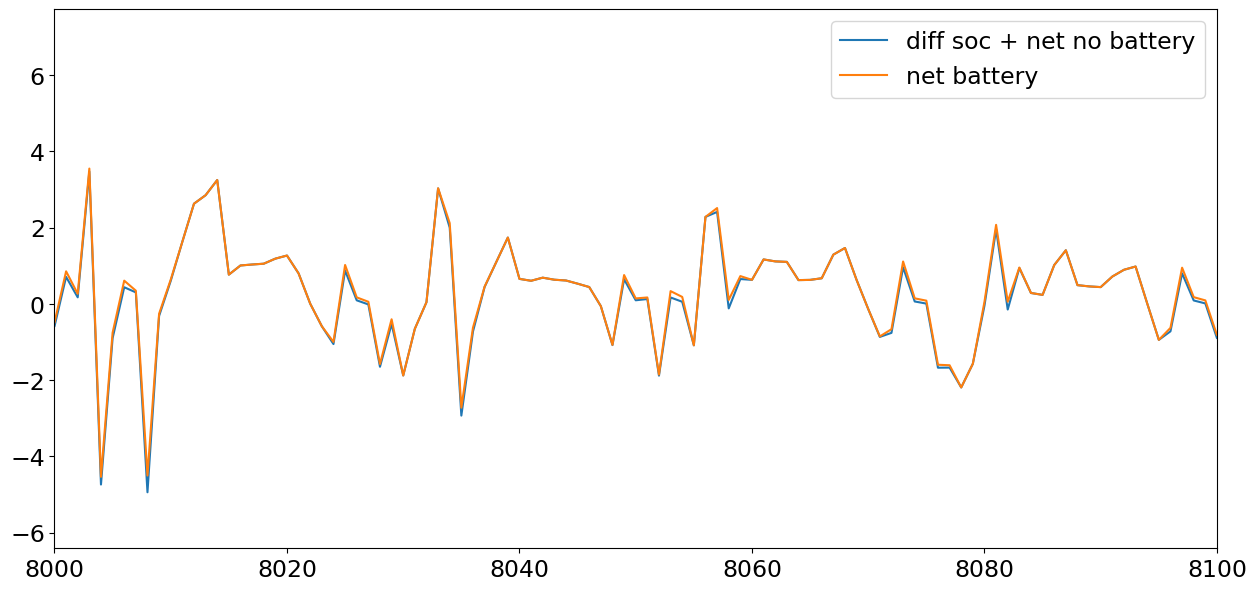

In [81]:
net_battery = buindings_df[0]["diff_soc"].values[:-1] + buindings_df[0]["net_no_battery"].values[1:]
plt.figure()
plt.plot(buindings_df[0].index[0:-1], net_battery, label="diff soc + net no battery")
plt.plot(buindings_df[0].index[0:-1], buindings_df[0]["net_battery"].values[1:], label="net battery")
plt.xlim((8000, 8100))
plt.legend()
plt.show()

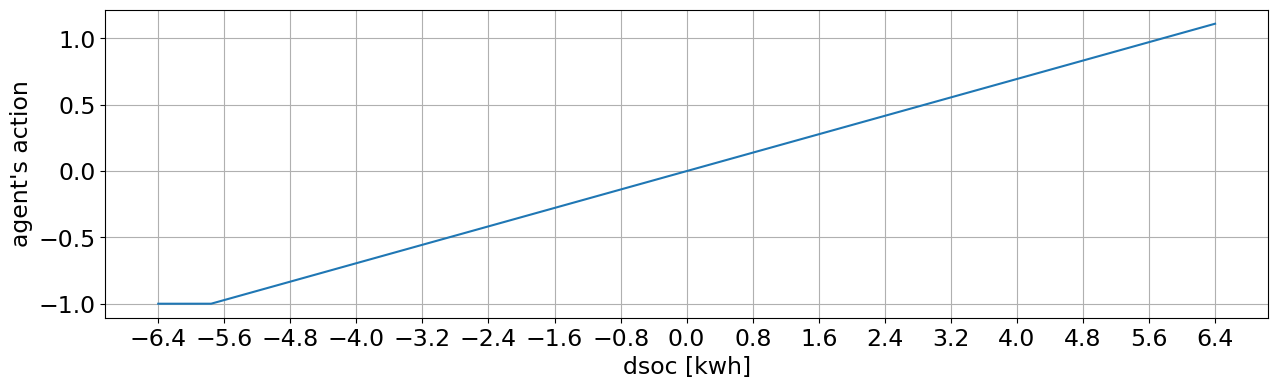

In [82]:
plt.figure(figsize=(15, 4))
plt.plot(np.linspace(-6.4, 6.4, 1000), np.maximum(np.linspace(-6.4, 6.4, 1000) / 6.4 / 0.9, -np.ones((1000))))
plt.xlabel("dsoc [kwh]")
plt.ylabel("agent's action")
plt.xticks(ticks=np.linspace(-6.4, 6.4, 17))
plt.grid()
plt.show()


In [84]:

for t in range(100, 124):
    print(f'\nHour: {t % 24}')
    print(f"price[t]:         {buindings_df[0].iloc[t].price}")
    print(f"price[t+1]:       {buindings_df[0].iloc[t+1].price}")
    print(f"net no bat [t]:   {buindings_df[0].iloc[t].net_no_battery}")
    print(f"net no bat [t+1]: {buindings_df[0].iloc[t+1].net_no_battery}")
    print(f"dsoc:             {buindings_df[0].iloc[t].diff_soc}")
    print(f"action kwh:       {buindings_df[0].iloc[t].actions_kwh}")
    print(f"action:           {max(buindings_df[0].iloc[t].actions_kwh / 6.4 / 0.9, -1)}")
    print(f"net bat:          {buindings_df[0].iloc[t+1].net_battery}")
    


Hour: 4
price[t]:         0.22
price[t+1]:       0.22
net no bat [t]:   1.7153499999999997
net no bat [t+1]: 0.993433333333333
dsoc:             0.0
action kwh:       -1.7153499999999997
action:           -0.2978038194444444
net bat:          0.993433333333333

Hour: 5
price[t]:         0.22
price[t+1]:       0.22
net no bat [t]:   0.993433333333333
net no bat [t+1]: 1.872883333333334
dsoc:             0.0
action kwh:       -0.993433333333333
action:           -0.17247106481481475
net bat:          1.872883333333334

Hour: 6
price[t]:         0.22
price[t+1]:       0.22
net no bat [t]:   1.872883333333334
net no bat [t+1]: 0.4355833333333329
dsoc:             0.0
action kwh:       -1.872883333333334
action:           -0.3251533564814815
net bat:          0.4355833333333329

Hour: 7
price[t]:         0.22
price[t+1]:       0.22
net no bat [t]:   0.4355833333333329
net no bat [t+1]: -0.3769499999999999
dsoc:             0.0
action kwh:       -0.4355833333333329
action:           -0.0756